# Derivation of Likelihood for 21cmMC

Here we will attempt to derive a top-level description of a likelihood function for 21cmMC, using the power spectrum approach. Along with this, we will highlight the various assumptions made, so that we can go off and test them.

## MCMC

The basic idea of MCMC is provide a solution for Bayes' theorem. The question that Bayes theorem answers is that of the probability of a given model parameterisation, given some data. That is, we want to know how probable a given set of parameters of a model is, given we have some data to test it on. Formally:

\begin{equation}
    P(\vec{\theta}|D) \propto P(D|\vec{\theta}) P(\vec{\theta}).
\end{equation}

The last factor is termed the "prior" and specifes our level of belief in a given set of parameter values without the given data, and the $P(D|\vec{\theta})$ is the likelihood. MCMC gives the answer to the LHS by choosing multiple values of $\theta$ in succession in a smart way, such that the final collection of $\theta$ itself forms the distribution that defines $P(\vec{\theta}|D)$. 

So, all we need to do is formally specify the likelihood, $P(D|\vec{\theta})$ (hereafter $P_D$). 

Keep in mind that $\vec{\theta}$ consists of *anything* that is a priori uncertain in the model. This includes unknown physical parameters, but also the unknown positions of every galaxy, or the unknown uncertainties on parameters. All of these need to be *specified* to determine $P_D$, and the resulting distribution will have as many dimensions as there are parameters (and there may be millions). Luckily, we usually don't care about many of the parameters, and we can easily ignore them properly by *marginalising* over them (i.e. integrating over those dimensions). This happens for free in MCMC, as long as we let those parameters vary freely.

## Likelihood of Lightcones

The first obvious idea for a likelihood of a 21cm lightcone might be to compare the brightness at any image voxel with a model. This is a *bad* idea for a couple of reasons. The first is that the brightnesses between voxels are clearly highly correlated (voxels close together are likely to be similar in brightness, and even more distant ones will be correlated because of cosmology). It's always nicer to deal with independent variables.

The second reason is that we don't *really* care about exactly how the sky looks. What we care about are the physical parameters. For each set of physical parameters, there are a whole family of skies that are possible (dependent on initial conditions). We don't care if we choose the exact sky from this family, we only care about what the family is, and how likely it is that our sky is a part of that family.

**Aside:** if we *did* know the initial conditions, or some information about them, then we could use that information to pare down the size of the families, and that would be useful. We will assume that we have no idea about the initial conditions.

One quantity which at least *claims* to do better on each of these points is the power spectrum. The power spectrum (at least the cosmological one) is expected to be roughly independent in every $k$ mode (whether this is still true after interaction with a radio telescope, I'm not sure, but let's go with it for now). Secondly, the power spectrum does *not* contain extra hidden parameters (i.e. initial conditions), since the phases of the FT are eliminated when going to a power spectrum. Thus we have a deterministic mapping between the physical parameters and the actual power spectrum distribution at a given wavemode $\vec{k}$. 

So, should we use the 3D, 2D, or 1D power spectrum? Well, so long as each wavemode is statistically equivalent (i.e. is independent and identically distributed), it does not matter at all. If you were to calculate the likelihood as the sum over every bin, or the likelihood of a single averaged bin, you'd get the same answer. Conversely, you *lose* information if you unwittingly average variables that aren't equivalent. 

The cosmological signal should be very close to isotropic, and so we can just as easily use the 1D power spectrum, though there is no true benefit in doing so. Nevertheless, the foregrounds are not isotropic in the parallel direction, and if they cannot be extricated from the signal, it is best to do the analysis at least in 2D. We will assume that both signal and foregrounds are angularly isotropic. 

## Likelihood using 2D PS

Lets say we have some data which has a 2D PS we'll call $P_{u\eta}$. This data contains foreground and instrumental noise, and is measured with an instrument (so different scales are pushed around a bit by the frequency-dependent array). 

*Though it's probably not true*, let's assume that each of the 2D bins of $P_{u\eta}$ is independent and has a Gaussian distribution. **We should check if this holds**.

Then the likelihood is very simple:

\begin{equation}
    \ln \mathcal{L} = -\frac{1}{2} \sum_{u,\eta} \frac{(P_\theta(u,\eta) - P_{u\eta})^2}{\sigma^2(\theta)}.
\end{equation}

Here $P_\theta$ is the expected power, given the model parameters, and $\sigma^2$ is the expected variance for those parameters.

Now, if we assume that the signal and foregrounds are independent (and I think this is a good assumption at this point), then the power spectrum can be broken up into those pieces. Since we have already assumed that the distribution is Gaussian, then each of those components *must* be Gaussian (again, this might not be true). Each of the pieces is convolved with the instrument, which we take for granted through the rest of the analysis, but we also note that the instrument adds Gaussian noise, so we get:

\begin{equation}
    \ln \mathcal{L} = -\frac{1}{2} \sum_{u,\eta} \frac{(P_{\rm 21} + P_{\rm FG} + P_N - P_{u\eta})^2}{\sigma^2_{\rm 21} + \sigma^2_{\rm FG} + \sigma^2_N}.
\end{equation}

### How to calculate this

This is a pretty simple equation. The only problem is in actually computing it. Note that if the foreground model and instrument are *known*, then they do not change on any given iteration, and they can be pre-computed. This means we can come up with an analytical model for them (remember we need the *expected* power and variance), or just run a bunch of simulations to calculate them. 

If we don't know them (there are unknown foreground parameters, for example), then we need to calculate them on every iteration. The best way to do this is by using an analytical model. But what if we don't have one, or it is too difficult to calculate?

Indeed, we *don't* have an analytical model for the 21cm signal. It is modified in real space by all sorts of physical effects that depend on the initial conditions. The only way to get it would be to run a whole bunch of simulations with the same parameters, and get the signal and its variance. But that would be only for a single set of parameters, so on a given iteration -- with different parameters -- it would be incorrect. 

I'm not yet quite sure of the best way to deal with this. I'm not sure there is *any* **correct** way, except for actually defining a model power spectrum and its distribution for the 21cm signal.

However, we can do *something*, by estimating the expected power as the average within the given UV annulus, and likewise for the variance. We could also use this method for the foregrounds if we didn't have an analytic model and required one. 

Do note that this method is *not correct*: the hope would be that by estimating it like this, but continuing to marginalise over realisations, that the uncertainty would be washed out. However, this is not strictly the case. To do this, one requires to specify the exact probability of the data given the model choice (including the initial conditions). But this is only an *estimate* of that quantity. At best we can hope that the estimate is very close to the truth and has very small Mean Standard Error.

## Does this likelihood do what we want it to?

First of all, it should be pointed out that, as long as we use a power spectrum (and assume Gaussianity etc.), then this is the *only* likelihood we can arrive at. It's not a choice. Doing a 1D or 3D PS is exactly equivalent (so long as we properly account for covariances etc.). A 3D PS is less convenient because we probably anyway need to determine $\sigma_{\rm 21}$ by averaging over annuli in the UV plane, so we might as well just do the average. 

Perhaps the question could be restated as "is this the best kind of likelihood, to be able to constrain parameters?". The answer to that question is yes, **if** our above assumptions are true -- i.e. that the statistics of successive frequencies are the same, and that the density perturbations are Gaussian. Neither of these assumptions is true, of course. In that case, while we can *use* this likelihood, it is not the best one to use -- it kills information. But we can worry about that later.

The point is, this likelihood behaves like we would expect. Note that we don't "suppress" the foregrounds in the data. Nevertheless, this suppression is exactly there. In wedge-modes, the power spectrum is dominated by foregrounds, and so it is much easier to get close to the data by small changes in the foregrounds, rather than the signal. However, these modes are significantly down-weighted by the larger values of $\sigma^2_{\rm FG}$ here. This is exactly the quadratic suppression.


## Summary

Finally, a summary. In our case, it seems that our likelihood is 

\begin{equation}
    \ln \mathcal{L} = -\frac{1}{2} \sum_{u,\eta} \frac{(P_{\rm 21} + P_{\rm FG} + P_N - P_{u\eta})^2}{\sigma^2_{\rm 21} + \sigma^2_{\rm FG} + \sigma^2_N}.
\end{equation}

and best done in 2D space. The assumptions made here are:

* The power spectrum is independent for each $u, \eta$ co-ordinates.
* The power spectrum has a Gaussian distribution. 
* Foregrounds are independent of signal, even after convolution with the instrument. 
* The above imply that both the foregrounds and signal have independent, Gaussian distributions.

These assumptions can be checked, and we should do so.

Also, we noted that unless we have an exact physical prediction of $\sigma_{\rm 21}$, this likelihood cannot work in detail. But pending other ideas, we'll press on with estimating it per-iteration, and hope that the inaccuracy is small.

### 1D Case

It would also be nice to *explicitly* derive the likelihood in the case that we average down to 1D. I cannot see how it would be different to the 2D case, but it might be useful to express things in this way, as it would mean better data-compression (i.e. fewer bins to sum over). Could you have a go at this, Bella?

## Likelihood from a simulation

The most tricky thing about our likelihood is that at least one of the models is only computable via simulation, and every time the parameters are visited, its output will change. The uncertainties from such an approximation should be propagated through, but doing so is rather tricky. 

To test our ideas about doing this, we can set up a basic test. Let's try to estimate the two parameters $(a,b)$ where our model is

$$ f(x) = ax + bx^2 + \mathcal{N}(0, ab)$$.

We will simulate some data with this model, and then fit the data with the exact model. Then we will fit it, assuming that we don't really know the model, but can simulate it. We'll do this in the simple way, and then also using 

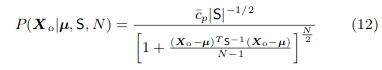

from https://arxiv.org/pdf/1511.05969.pdf.

The idea is to test if the resulting statistics are consistent or biased.

In [141]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import corner

import emcee
from emcee.utils import sample_ball
from scipy.special import gamma

In [218]:
a,b = 4, 3
x = np.arange(1,12)

data = a + b*x**2 + np.random.normal(scale=x**2, size=len(x))

<ErrorbarContainer object of 3 artists>

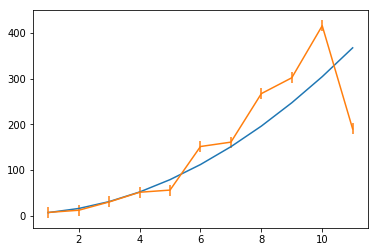

In [219]:
plt.plot(x, a+b*x**2)
plt.errorbar(x, data, yerr=a*b)

In [213]:
def lnl_deterministic(params, x, data):
    a,b = params
    
    # Make sure we have positive sigma.
    if a*b <= 0:
        return -np.inf
    
    model = a + b*x**2
    
    out = np.sum(-0.5 * (data - model)**2 / (x**2))
    
    if np.isnan(out):
        print("%s %s returned nan"%(a,b))
        
    return out

In [214]:
sampler = emcee.EnsembleSampler(
    nwalkers = 50,
    dim = 2,
    lnpostfn = lnl_deterministic,
    args = (x, data),
    threads = 6
)

In [215]:
pos0_initial = sample_ball([a,b], [1.0, 1.0], size=50)

In [220]:
# burnin
pos0, lnprob, rstate = sampler.run_mcmc(pos0_initial, 100)

# actual sampling
sampler.reset()
sampler.run_mcmc(pos0, N=1000, rstate0=rstate, lnprob0=lnprob);

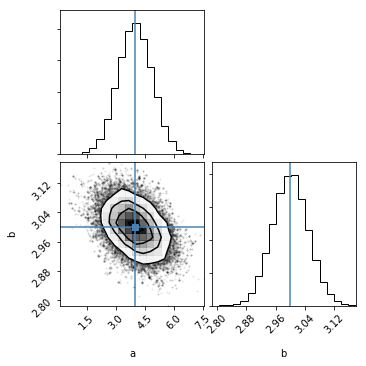

In [221]:
corner.corner(sampler.flatchain, labels=['a','b'], truths=[a,b]);

In [222]:
def lnl_simulated(params, x, data, n):
    a,b = params
    
    simulated_data = a + b*x**2 + np.random.normal(scale=x**2, size=(n,len(x)))
    
    fbar = np.mean(simulated_data, axis=0)
    s = np.std(simulated_data, axis=0)
    
    return np.sum(-0.5 * (data - fbar)**2 / (s**2))

In [223]:
sampler_sim = emcee.EnsembleSampler(
    nwalkers = 50,
    dim = 2,
    lnpostfn = lnl_simulated,
    args = (x, data, 200),
    threads = 6
)

In [224]:
# burnin
pos0, lnprob, rstate = sampler_sim.run_mcmc(pos0_initial, 100)

# actual sampling
sampler_sim.reset()
sampler_sim.run_mcmc(pos0, N=1000, rstate0=rstate, lnprob0=lnprob);

In [225]:
sampler_sim.acceptance_fraction

array([0.649, 0.646, 0.655, 0.675, 0.646, 0.673, 0.624, 0.662, 0.644,
       0.631, 0.682, 0.648, 0.628, 0.651, 0.651, 0.642, 0.656, 0.639,
       0.613, 0.643, 0.637, 0.672, 0.64 , 0.642, 0.668, 0.664, 0.677,
       0.658, 0.635, 0.629, 0.679, 0.639, 0.684, 0.624, 0.643, 0.629,
       0.638, 0.629, 0.644, 0.626, 0.658, 0.629, 0.642, 0.66 , 0.639,
       0.642, 0.648, 0.675, 0.643, 0.673])

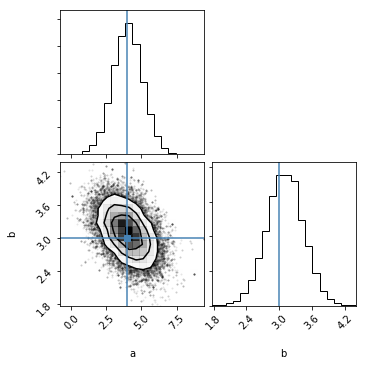

In [226]:
corner.corner(sampler_sim.flatchain, labels=['a','b'], truths=[a,b]);

In [227]:
np.mean(sampler_sim.flatchain, axis=0), np.std(sampler_sim.flatchain, axis=0)

(array([4.00881108, 3.10332689]), array([1.07493213, 0.3377872 ]))

In [228]:
np.mean(sampler.flatchain, axis=0), np.std(sampler.flatchain, axis=0)

(array([3.99355287, 2.99978635]), array([0.88315128, 0.04897563]))

In [187]:
def lnl_sellentin(params, x, data, n):
    a,b = params
    
    simulated_data = a + b*x**2 + np.random.normal(scale=5, size=(n,len(x)))
    
    fbar = np.mean(simulated_data, axis=0)
    s = np.var(simulated_data, axis=0)
    dets = np.prod(s)
    
    cp = gamma(n/2)/(np.pi*(n-1))/ gamma((n-2)/2)
    return cp/np.sqrt(dets)/(1 + np.sum((data-fbar)**2/s/(n-1)))

In [188]:
sampler_sell = emcee.EnsembleSampler(
    nwalkers = 50,
    dim = 2,
    lnpostfn = lnl_sellentin,
    args = (x, data, 200),
    threads = 6
)

/home/steven/miniconda3/envs/21CMMC/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in double_scalars
/home/steven/miniconda3/envs/21CMMC/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in true_divide
/home/steven/miniconda3/envs/21CMMC/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in double_scalars


In [189]:
lnl_sellentin([a-100.0,b], x, data, 100)

1.9113208290957297e-11

In [190]:
# burnin
pos0, lnprob, rstate = sampler_sell.run_mcmc(pos0_initial, 100)

# actual sampling
sampler_sell.reset()
sampler_sell.run_mcmc(pos0, N=1000, rstate0=rstate, lnprob0=lnprob);

NaN value of lnprob for parameters: 
[6.41941347e+16 6.96829078e+15]


ValueError: lnprob returned NaN.

In [161]:
sampler_sell.acceptance_fraction

array([0.5       , 0.83333333, 1.        , 0.83333333, 0.5       ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 0.83333333, 1.        , 1.        , 1.        ,
       1.        , 0.66666667, 1.        , 0.83333333, 1.        ,
       1.        , 1.        , 1.        , 0.83333333, 0.66666667,
       0.66666667, 0.83333333, 0.83333333, 0.83333333, 0.66666667,
       0.83333333, 0.83333333, 0.5       , 0.66666667, 0.83333333,
       0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
       0.83333333, 0.83333333, 0.66666667, 0.83333333, 0.83333333,
       0.83333333, 0.66666667, 0.83333333, 0.66666667, 0.83333333])

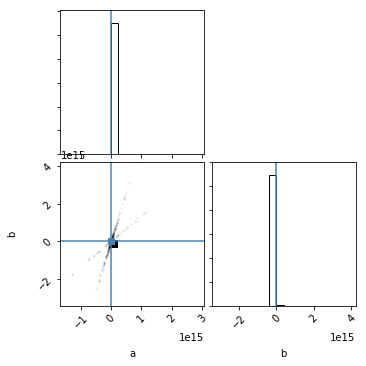

In [150]:
corner.corner(sampler_sell.flatchain, labels=['a','b'], truths=[a,b]);

In [230]:
def lnl_hartlap(params, x, data, n):
    a,b = params
    
    simulated_data = a + b*x**2 + np.random.normal(scale=x**2, size=(n,len(x)))
    
    fbar = np.mean(simulated_data, axis=0)
    s = np.var(simulated_data, axis=0)
    
    s *= (n-len(params)-2)/(n-1)
    
    return np.sum(-0.5 * (data - fbar)**2 / s)

In [231]:
sampler_hart = emcee.EnsembleSampler(
    nwalkers = 50,
    dim = 2,
    lnpostfn = lnl_hartlap,
    args = (x, data, 10),
    threads = 6
)

In [232]:
# burnin
pos0, lnprob, rstate = sampler_hart.run_mcmc(pos0_initial, 100)

# actual sampling
sampler_hart.reset()
sampler_hart.run_mcmc(pos0, N=3000, rstate0=rstate, lnprob0=lnprob);

In [233]:
sampler_hart.acceptance_fraction

array([0.12733333, 0.14466667, 0.12333333, 0.12033333, 0.14033333,
       0.13066667, 0.119     , 0.13866667, 0.13333333, 0.12533333,
       0.11533333, 0.10333333, 0.136     , 0.141     , 0.12933333,
       0.12033333, 0.10333333, 0.111     , 0.13533333, 0.11333333,
       0.14033333, 0.12666667, 0.13233333, 0.102     , 0.12133333,
       0.107     , 0.088     , 0.141     , 0.168     , 0.134     ,
       0.12433333, 0.14333333, 0.09266667, 0.146     , 0.12133333,
       0.107     , 0.136     , 0.115     , 0.129     , 0.125     ,
       0.12466667, 0.08066667, 0.12533333, 0.11533333, 0.132     ,
       0.08966667, 0.11033333, 0.14333333, 0.07733333, 0.11166667])

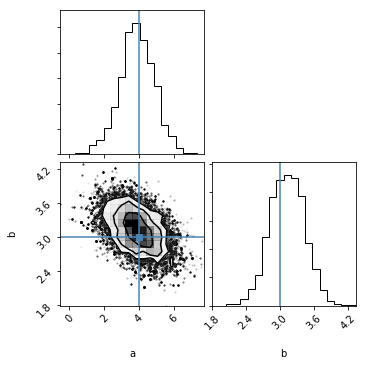

In [234]:
corner.corner(sampler_hart.flatchain, labels=['a','b'], truths=[a,b]);

In [235]:
np.mean(sampler_hart.flatchain, axis=0), np.std(sampler_hart.flatchain, axis=0)

(array([3.88458755, 3.12451383]), array([0.99783554, 0.30304328]))